In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("../data/World_Countries_(Generalized)/World_Countries__Generalized_.shp")
print(regions.crs)

EPSG:4326


In [3]:
# Create a DataFrame with health facilities in Ghana
satellite_df = pd.read_csv("../data/last_30_days_launches.csv")

# Convert the DataFrame to a GeoDataFrame
satellite_pos = gpd.GeoDataFrame(satellite_df, geometry=gpd.points_from_xy(satellite_df.Longitude, satellite_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
satellite_pos.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
satellite_pos.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Satellite,Latitude,Longitude,geometry
1,LUMELITE-4,-1.473385,82.800583,POINT (82.80058 -1.47339)
250,LUMELITE-4,-1.943271,93.733819,POINT (93.73382 -1.94327)
499,LUMELITE-4,-2.415983,104.709840,POINT (104.70984 -2.41598)
748,LUMELITE-4,-2.890558,115.731104,POINT (115.73110 -2.89056)
997,LUMELITE-4,-3.365965,126.800385,POINT (126.80039 -3.36596)


<AxesSubplot: >

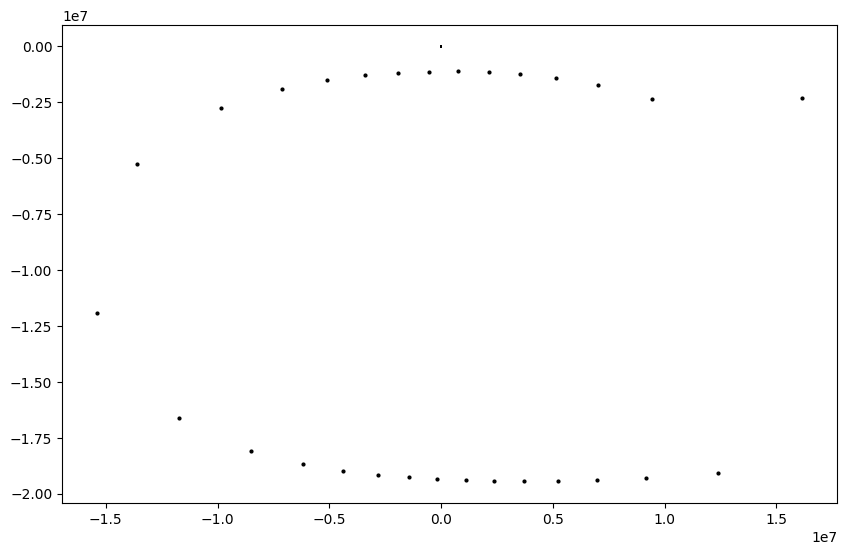

In [9]:
# Create a map
ax = regions.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
satellite_pos.to_crs(epsg=32630).plot(markersize=1, ax=ax)